In [10]:
import scipy
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pygmt

robbins = pd.read_csv("lunar_crater_database_robbins_2018.csv")
coords_LL = robbins[['LON_CIRC_IMG','LAT_CIRC_IMG']]

# translate into cylindrical equal area projection
def translate_lat(latitude_i):
    return np.sin(np.deg2rad(latitude_i))
def translate_lon(longitude_i):
    return np.pi * longitude_i / 180
coords_C=pd.DataFrame()
coords_C.loc[:, 'LON_CIRC_IMG'] = coords_LL.loc[:, 'LON_CIRC_IMG'].apply(translate_lon)
coords_C.loc[:, 'LAT_CIRC_IMG'] = coords_LL.loc[:, 'LAT_CIRC_IMG'].apply(translate_lat)

coords_C_num = coords_C.to_numpy()

x = coords_C_num[:,0]
y = coords_C_num[:,1]

nbins=100
k = scipy.stats.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
%store xi yi zi

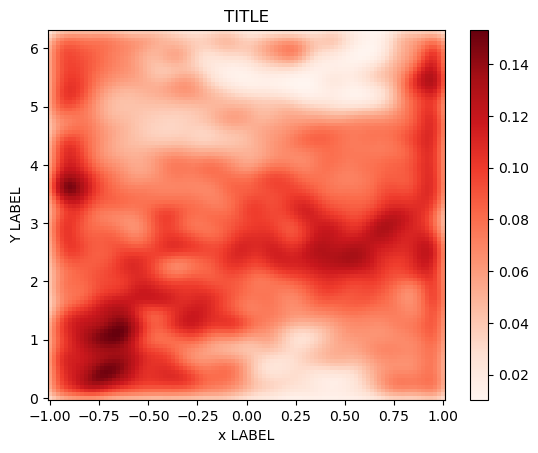

In [9]:
%store -r xi yi zi
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.Reds)
plt.colorbar() # COLORBAR
plt.xlabel('x LABEL')
plt.ylabel('Y LABEL') #unsure if messed up order
plt.title("TITLE")
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html


https://www.python-graph-gallery.com/85-density-plot-with-matplotlib

Unsure if color bar is necessary or if it adds confusion since I don't know the units


